In [1]:
import glob
import os
import os.path
import tarfile

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
GDRIVE = '/content/drive'
DATA_DIR = '{}/MyDrive/ime/allan-matheus-mestrado/data/'.format(GDRIVE)
TEMP_DIR = '/content/data'

In [4]:
from google.colab import drive
drive.mount(GDRIVE)

Mounted at /content/drive


In [5]:
os.makedirs(TEMP_DIR, exist_ok=True)

In [6]:
with tarfile.open(os.path.join(DATA_DIR, 'csv-2019-12.tar.gz')) as archive:
    archive.extractall(TEMP_DIR)

In [7]:
!ls {TEMP_DIR}/csv-2019-12/ | head -n5

std-blast-instance-000002d3-5de7b3499975b01756272e65.out.monitor.csv
std-blast-instance-000002d4-5de7b34e9975b01756272e67.out.monitor.csv
std-blast-instance-000002d5-5de7bee49975b01756272e69.out.monitor.csv
std-blast-instance-000002d6-5de7c56a9975b01756272e6b.out.monitor.csv
std-blast-instance-000002d7-5de7d4779975b01756272e6d.out.monitor.csv


In [37]:
samples = {
    'Blast': 'std-blast-instance-00000336-5deb0df01b1d9b3336951805.out.monitor.csv',
    'HPL': 'std-hpl-instance-0000030b-5de9d6ee1b1d9b33369517af.out.monitor.csv', #'std-hpl-instance-000002bf-5de727559975b01756272e3d.out.monitor.csv',
    'IOzone': 'std-iozone-instance-00000322-5dea8a6b1b1d9b33369517dd.out.monitor.csv',
    'Montage': 'std-montage-instance-0000032c-5deaa7c51b1d9b33369517f1.out.monitor.csv' #'std-montage-instance-000002dd-5de843f39975b01756272e79.out.monitor.csv'
}

In [31]:
def plot_task_execution(df, title, figsize=(8, 6)):
    fig = plt.figure(figsize=figsize, constrained_layout=True)
    gs = fig.add_gridspec(2, 2)
    top = fig.add_subplot(gs[0, :])
    top.fill_between(df.index, df.cpu, color="C0", alpha=0.1)
    top.plot(df.index, df.cpu, color='C0', label='CPU')
    top.set_ylim([0, 110])
    top.fill_between(df.index, 100*df.memory/24, color="C1", alpha=0.1)
    top.plot(df.index, 100*df.memory/24, color='C1', label='Memória')
    top.set_title('CPU e Memória')
    top.legend()
    bottom = fig.add_subplot(gs[1, :])
    bottom.fill_between(df.index, df.io_total, color="C2", alpha=0.1)
    bottom.plot(df.index, df.io_total, color='C2', label='E/S (total)')
    bottom.fill_between(df.index, df.io_read, color="C3", alpha=0.1)
    bottom.plot(df.index, df.io_read, color='C3', label='E/S (leitura)')
    bottom.fill_between(df.index, df.io_write, color="C4", alpha=0.1)
    bottom.plot(df.index, df.io_write, color='C4', label='E/S (escrita)')
    bottom.set_ylim([0, 1e8])
    bottom.set_title('E/S')
    bottom.legend()
    fig.suptitle(title, fontsize=16)
    return plt

In [41]:
def plot_task_execution_from_sample(sample, **kwargs):
    filename = os.path.join(TEMP_DIR, 'csv-2019-12', sample)
    app = sample.split('-')[1]
    app_names = {
        "blast": "Blast",
        "hpl": "HPL",
        "montage": "Montage",
        "iozone": "IOzone"
    }
    title = 'Amostra de monitoramento para aplicação {}'.format(app_names[app])
    df = pd.read_csv(filename)
    #df.plot(subplots=True, figsize=(10, 8), title=title)
    return plot_task_execution(df, title, **kwargs)

## Blast

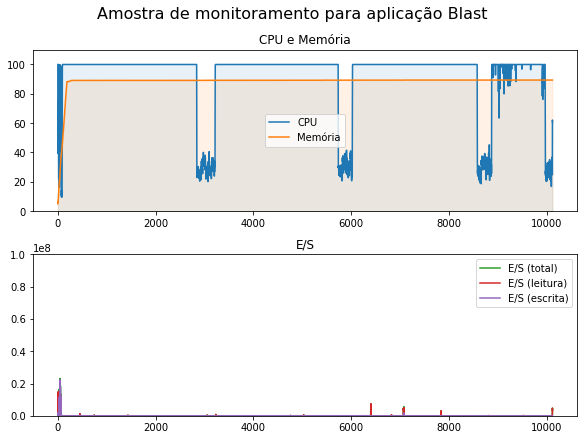

In [42]:
plot_task_execution_from_sample(samples['Blast']).savefig("blast-monitor.pdf")

## HPL

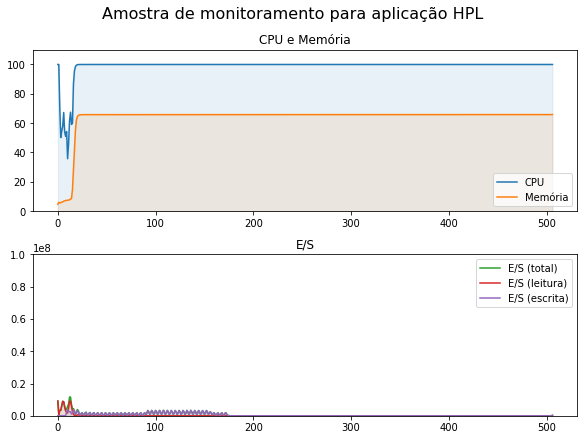

In [43]:
plot_task_execution_from_sample(samples['HPL']).savefig("hpl-monitor.pdf")

## Iozone

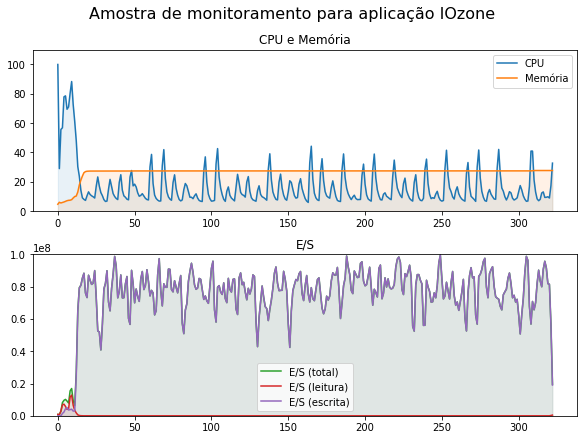

In [44]:
plot_task_execution_from_sample(samples['IOzone']).savefig("iozone-monitor.pdf")

## Montage

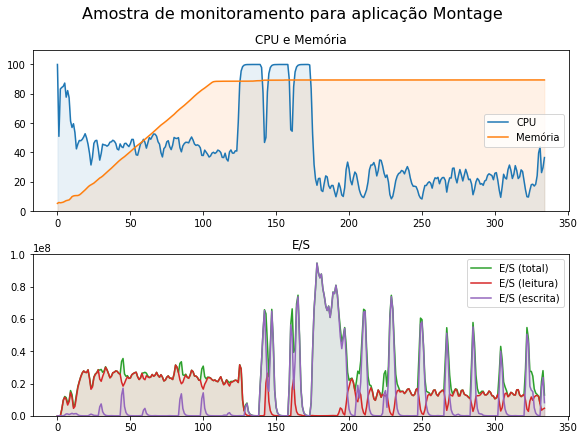

In [46]:
plot_task_execution_from_sample(samples['Montage']).savefig("montage-monitor.pdf")

## Nota sobre o KVM memory ballooing

Devido ao memory ballooning implementado no KVM (https://en.wikipedia.org/wiki/Memory_ballooning), o monitoramento (externo) detecta a variação de memória apenas quando o consumo supera o último pico, isto é, a curva obtida é sempre crescente.